 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

In [2]:
# Reading whale returns

whale_returns_csv = Path("../UNCC_FINTECH/UNC-CHACC-FIN-PT-03-2020-U-C/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")

whale_returns_df = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls

whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

whale_returns_df = whale_returns_df.dropna()
whale_returns_df 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

algo_returns_csv = Path("../UNCC_FINTECH/UNC-CHACC-FIN-PT-03-2020-U-C/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")

algo_returns_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls

algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index

sp500_history_csv = Path("../UNCC_FINTECH/UNC-CHACC-FIN-PT-03-2020-U-C/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")

sp500_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types

sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

sp500_df['Close'] = sp500_df['Close'].str[1:]
    
sp500_df['Close'] = pd.to_numeric(sp500_df['Close'])

#Renamed column from 'Close' to 'S&P 500'
sp500_df['S&P 500'] = sp500_df['Close']

print(sp500_df['S&P 500'])


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: S&P 500, Length: 1649, dtype: float64


In [11]:
# Calculate Daily Returns

sp500_daily_returns = sp500_df['S&P 500'].pct_change()
sp500_daily_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: S&P 500, dtype: float64

In [12]:
# Drop nulls

sp500_daily_returns = sp500_daily_returns.dropna()

## Combine Whale, Algorithmic, and S&P 500 Returns

In [13]:
# Concatenate all DataFrames into a single DataFrame

total_returns = pd.concat([algo_returns_df, whale_returns_df,sp500_daily_returns], axis='columns', join='inner')
total_returns.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,0.004408
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.001195
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.014378
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.017254


---

# Portfolio Analysis


### Does any portfolio outperform the S&P 500?

#### When looking at the trend in cumulative returns, both alogrithm portfolios, Soros Fund Management, and Berkshire Hathaway perform better than the S&P 500. Paulson & CO follows a similiar downward trend in cumulative returns with the S&P 500. Tiger Global Management began with an upward trend but reversed to a downward trend. 

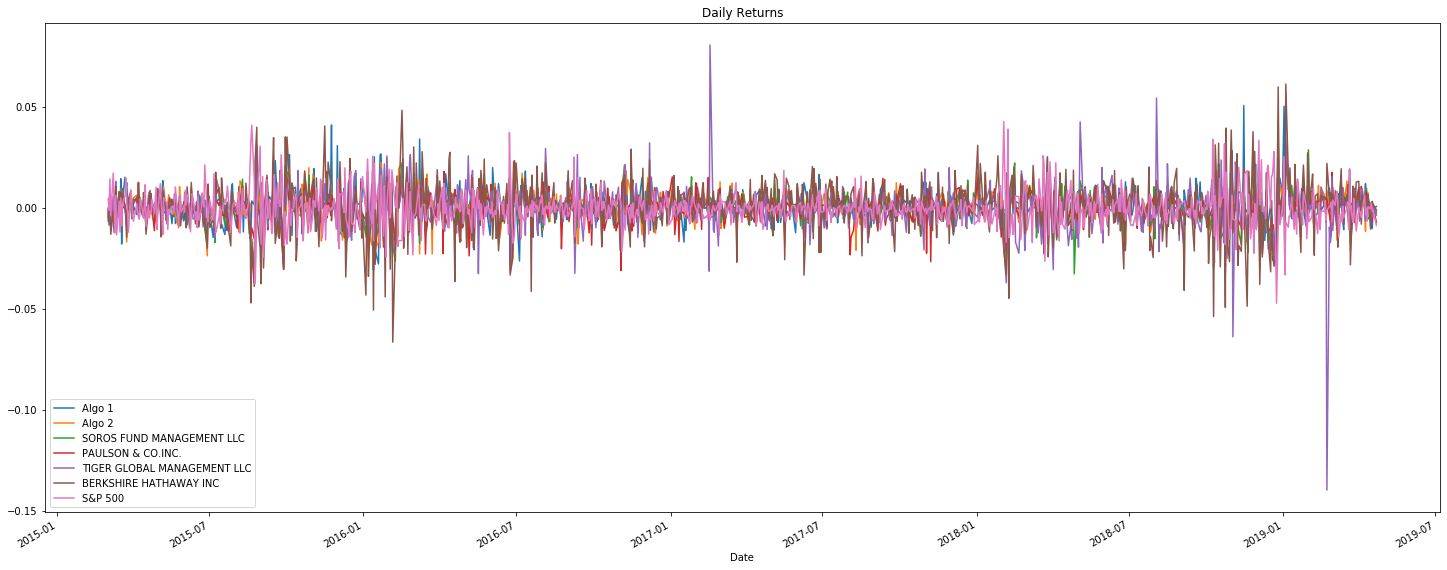

In [14]:
# Plot daily returns

total_returns.plot(figsize=(25,10), title='Daily Returns')

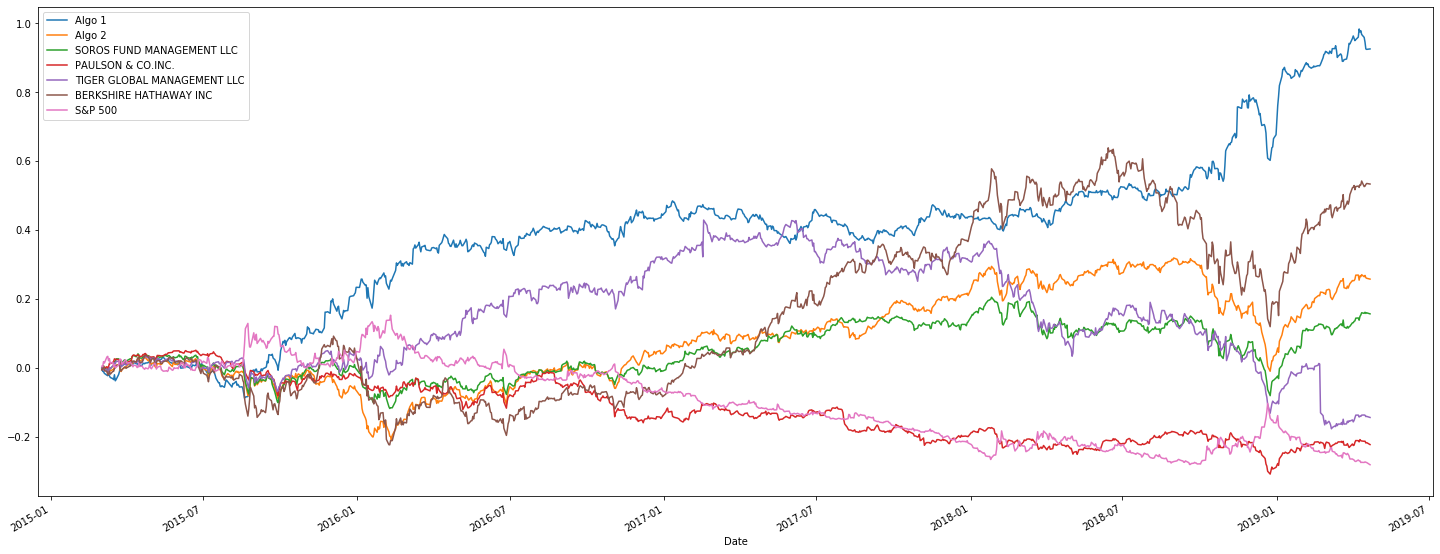

In [15]:
# Plot cumulative returns

cumulative_returns = (1 + total_returns).cumprod()-1
cumulative_returns.plot(figsize=(25,10))

---

# Risk

### Determine the _risk_ of each portfolio. Which box has the largest spread? Which has the smallest spread?

#### The box with the largets spread is Tiger Global Managment. This portfolio had the largest outlier both above and below 0.  The box with the smallest spread is Paulson & CO.

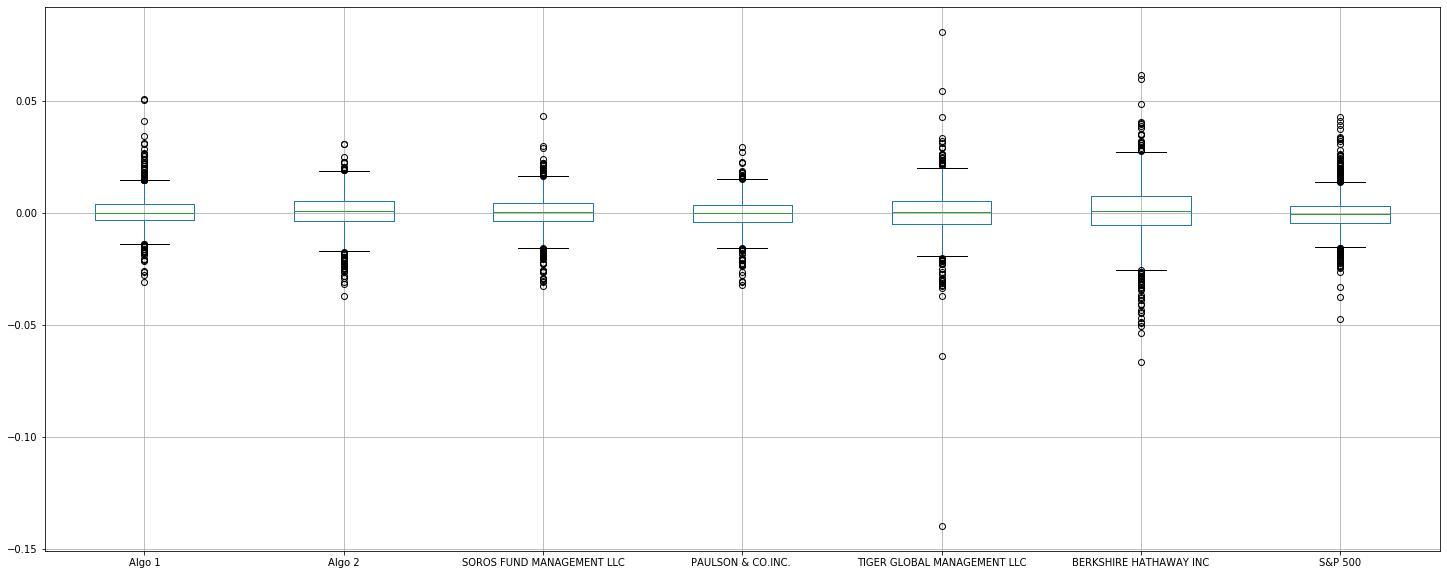

In [16]:
# Box plot to visually show risk

total_returns.boxplot(figsize=(25,10))

## Which portfolios are riskier than the S&P 500?

#### Bershire Hathaway is the riskiest portfolio when looking at standard deviation. Tiger Global Management is also riskier than the S&P 500. 

In [17]:
# Daily Standard Deviations

total_returns_std = total_returns.std()

total_returns_std


Algo 1                         0.007623
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
S&P 500                        0.008587
dtype: float64

In [18]:
# Sorted Standard Deviation

total_returns_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [19]:
# Calculate the annualized standard deviation (252 trading days)

total_returns_annual_std = total_returns_std * np.sqrt(252)
total_returns_annual_std

Algo 1                         0.121006
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
S&P 500                        0.136313
dtype: float64

---

# Rolling Statistics

 
## Does the risk increase for each of the portfolios at the same time risk increases in the S&P?

#### There are periods when the risk for Berkshire Hathway and the S&P increase at the same time, but not by the same amount. 

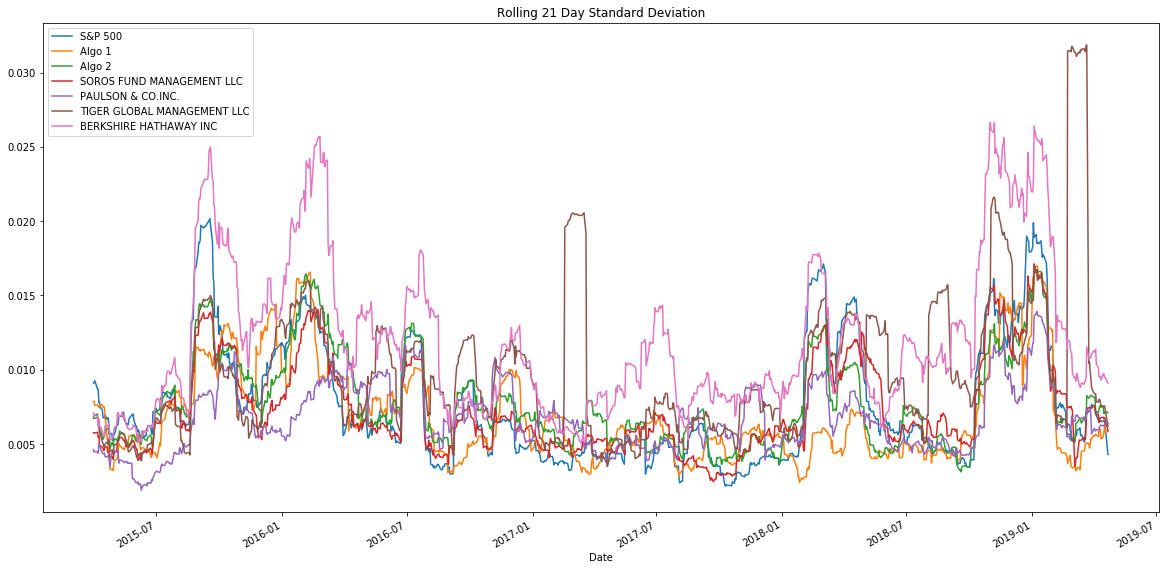

In [20]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window

ax = total_returns['S&P 500'].rolling(window=21).std().plot(figsize=(20, 10), title='Rolling 21 Day Standard Deviation')
total_returns['Algo 1'].rolling(window=21).std().plot(ax=ax)
total_returns['Algo 2'].rolling(window=21).std().plot(ax=ax)
total_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std().plot(ax=ax)
total_returns['PAULSON & CO.INC. '].rolling(window=21).std().plot(ax=ax)
total_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std().plot(ax=ax)
total_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).std().plot(ax=ax)


# Set the legend of the figure
ax.legend(["S&P 500", "Algo 1", "Algo 2", 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'])

### Which returns most closely mimic the S&P?

#### None of the portfolios are correlated to the S&P 500. The portfolio with the highest correlation to the index is Paulson and CO. with an underwhelming 0.013.

In [21]:
# Correlation

total_returns_corr = total_returns.corr()
total_returns_corr

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
Algo 1,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678,-0.033963
Algo 2,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756,-0.002192
SOROS FUND MANAGEMENT LLC,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157,0.000574
PAULSON & CO.INC.,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125,-0.001505
BERKSHIRE HATHAWAY INC,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000,-0.013856
S&P 500,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856,1.000000


### Does the portfolio seem sensitive to movements in the S&P 500?

I computed the beta for Paulson & CO. agaisnt the S&P 500. This portfolio does not seem sensative to movements in the S&P 500.

In [22]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

var = total_returns['S&P 500'].var() 
var

7.373467552840441e-05

In [23]:
paulson_cov = total_returns['PAULSON & CO.INC. '].cov(total_returns['S&P 500'])
paulson_cov

8.173659005663558e-07

In [24]:
paulson_beta = paulson_cov / var

paulson_beta

0.0110852308592785

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)


In [25]:
# Annualzied Sharpe Ratios

sharpe_ratios = (total_returns.mean() * 252) / (total_returns_std * np.sqrt(252))
sharpe_ratios

Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
S&P 500                       -0.518582
dtype: float64

 ### On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?
 
 #### Algo 1 is the best performer here, followed by Berkshire Hathaway and then Algo 2. The algorithms are performing very well when compared to the S&P 500, which has a negative sharpe ratio in this time frame. 

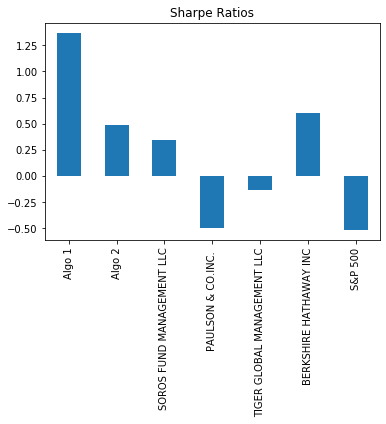

In [26]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar(title='Sharpe Ratios')

---

# Portfolio Returns

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock

amzn_csv = Path('amzn.csv') 
amzn_df = pd.read_csv(amzn_csv, index_col='Date', parse_dates=True, infer_datetime_format=True) 
amzn_df.rename(columns = {'Close':'AMZN'}, inplace = True)
amzn_returns_df = amzn_df.pct_change()
amzn_returns_df.head()

,AMZN
Date,
2015-11-02,NaN
2015-11-03,-0.004838
2015-11-04,0.025012
2015-11-05,0.022935
2015-11-06,0.005674


In [28]:
# Read the second stock

sq_csv = Path('sq.csv') 
sq_df = pd.read_csv(sq_csv, index_col='Date', parse_dates=True, infer_datetime_format=True) 

sq_df.rename(columns = {'Close':'SQ'}, inplace = True)

sq_returns_df = sq_df.pct_change()
sq_returns_df = sq_returns_df.dropna()
sq_returns_df.head()

,SQ
Date,
2015-11-20,-0.016832
2015-11-23,-0.056809
2015-11-24,-0.008251
2015-11-25,-0.009983
2015-11-27,0.012605


In [29]:
# Read the third stock

x_csv = Path('x.csv') 
x_df = pd.read_csv(x_csv, index_col='Date', parse_dates=True, infer_datetime_format=True) 
x_df.rename(columns = {'Close':'X'}, inplace = True)
x_returns_df = x_df.pct_change()
x_returns_df.head()

,X
Date,
2015-11-02,NaN
2015-11-03,0.009360
2015-11-04,-0.145286
2015-11-05,-0.060579
2015-11-06,0.050048


In [30]:
#Read 4th Stock

twtr_csv = Path('twtr.csv') 
twtr_df = pd.read_csv(twtr_csv, index_col='Date', parse_dates=True, infer_datetime_format=True) 
twtr_df.rename(columns = {'Close':'TWTR'}, inplace = True)
twtr_returns_df = twtr_df.pct_change()
twtr_returns_df.head()

,TWTR
Date,
2015-11-02,NaN
2015-11-03,-0.002397
2015-11-04,0.007896
2015-11-05,-0.023842
2015-11-06,-0.013259


In [31]:
# Concatenate all stocks into a single DataFrame

my_portfolio_returns = pd.concat([amzn_returns_df, sq_returns_df, x_returns_df, twtr_returns_df], axis='columns', join='inner')
my_portfolio_returns.columns=['AMZN', 'SQ', 'X', 'TWTR']
my_portfolio_returns.head()

,AMZN,SQ,X,TWTR
Date,,,,
2015-11-20,0.010858,-0.016832,-0.096573,-0.001900
2015-11-23,0.015768,-0.056809,-0.080460,-0.040731
2015-11-24,-0.011547,-0.008251,0.012500,0.012698
2015-11-25,0.006243,-0.009983,0.016049,0.021160
2015-11-27,-0.003080,0.012605,-0.018226,-0.011896


In [32]:
# Drop Nulls

my_portfolio_returns.isnull().sum()
my_portfolio_returns = my_portfolio_returns.dropna()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Calculate weighted portfolio returns

weights = [1/4, 1/4, 1/4, 1/4]

my_portfolio_returns = my_portfolio_returns.dot(weights)
my_portfolio_returns.head()

Date
2015-11-20   -0.026112
2015-11-23   -0.040558
2015-11-24    0.001350
2015-11-25    0.008367
2015-11-27   -0.005149
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:

joined_returns = pd.concat([total_returns, my_portfolio_returns], axis='columns', join='inner')
joined_returns.rename(columns = {0:'TORY'}, inplace = True)
joined_returns.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,TORY
Date,,,,,,,,
2015-11-20,-0.000583,0.000913,0.005784,0.006760,0.003272,0.022681,0.001236,-0.026112
2015-11-23,0.012757,0.002214,-0.001089,-0.003781,0.003151,0.012117,-0.001221,-0.040558
2015-11-24,0.041067,0.007598,0.003382,0.006359,0.003376,-0.006365,0.000129,0.001350
2015-11-25,-0.000418,0.004740,0.002190,0.004682,0.001628,0.000008,-0.000593,0.008367
2015-11-27,0.001387,0.003810,-0.000389,0.000004,0.001180,0.004219,0.004663,-0.005149


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

joined_returns.isnull().sum()

Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
S&P 500                        0
TORY                           0
dtype: int64

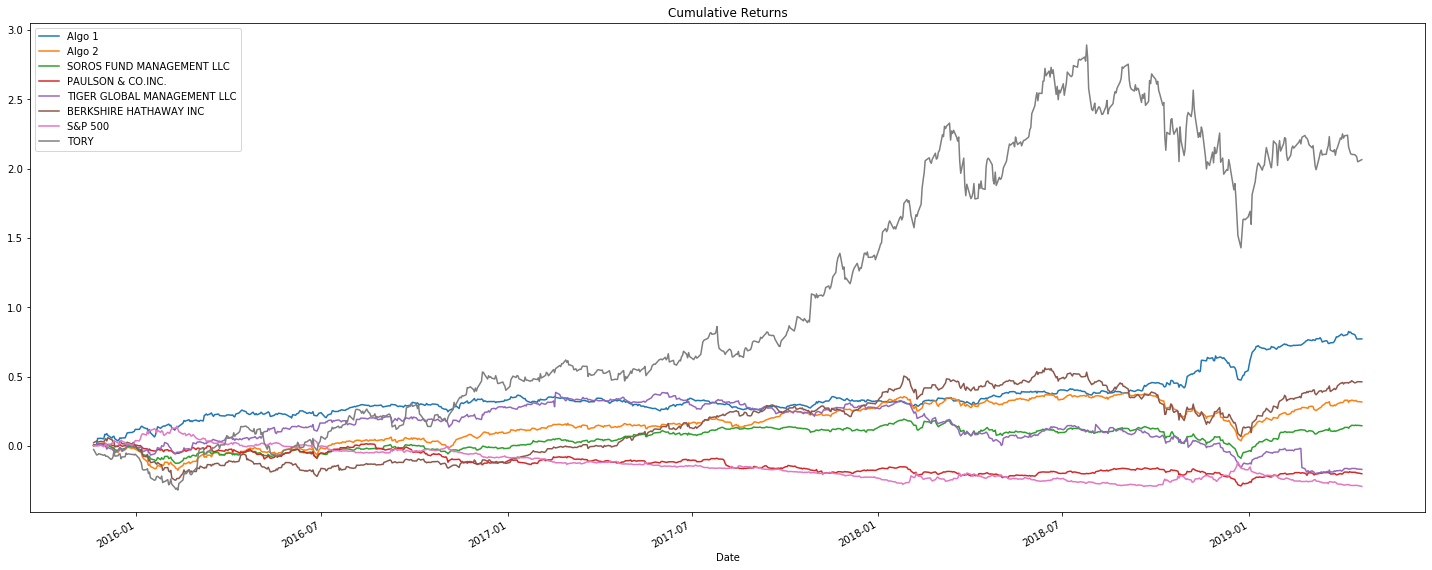

In [36]:
#Cumulative Returns

joined_cumulative_returns = (1 + joined_returns).cumprod()-1
joined_cumulative_returns.plot(figsize=(25,10), title='Cumulative Returns')

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk

joined_volatility = joined_returns.std() * np.sqrt(252)
joined_volatility.sort_values(ascending=False)

TORY                           0.324127
BERKSHIRE HATHAWAY INC         0.206125
TIGER GLOBAL MANAGEMENT LLC    0.181872
Algo 2                         0.131460
S&P 500                        0.131371
SOROS FUND MANAGEMENT LLC      0.124984
Algo 1                         0.119024
PAULSON & CO.INC.              0.114794
dtype: float64

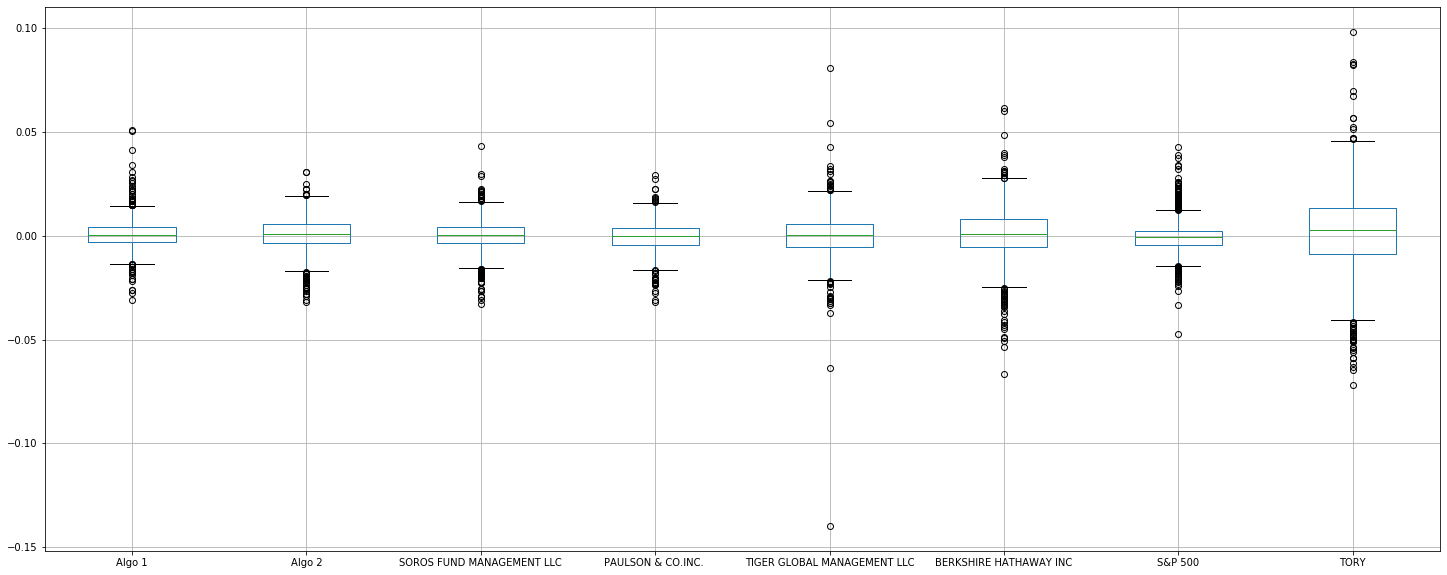

In [38]:
# Box PLot
joined_returns.boxplot(figsize=(25,10))

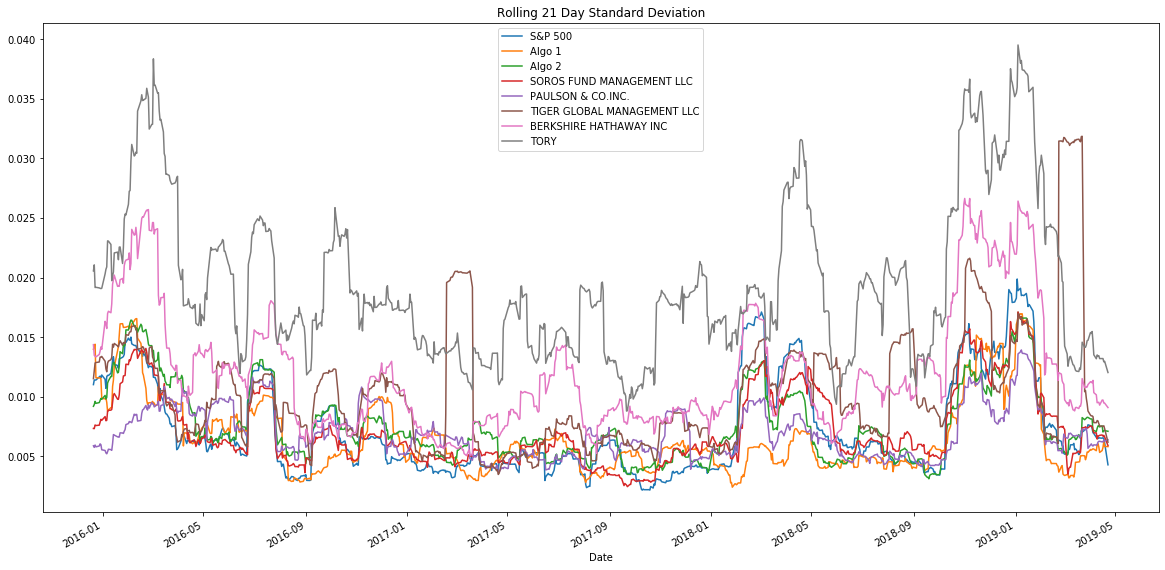

In [39]:
# Rolling

ax = joined_returns['S&P 500'].rolling(window=21).std().plot(figsize=(20, 10), title='Rolling 21 Day Standard Deviation')
joined_returns['Algo 1'].rolling(window=21).std().plot(ax=ax)
joined_returns['Algo 2'].rolling(window=21).std().plot(ax=ax)
joined_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std().plot(ax=ax)
joined_returns['PAULSON & CO.INC. '].rolling(window=21).std().plot(ax=ax)
joined_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std().plot(ax=ax)
joined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).std().plot(ax=ax)
joined_returns['TORY'].rolling(window=21).std().plot(ax=ax)

# Set the legend of the figure

ax.legend(["S&P 500", "Algo 1", "Algo 2", 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'TORY'])

In [40]:
# Beta

var = total_returns['S&P 500'].var() 
var

tory_cov = joined_returns['TORY'].cov(total_returns['S&P 500'])
tory_cov

tory_beta = tory_cov / var

tory_beta

0.048289702850982726

In [41]:
# Annualzied Sharpe Ratios

joined_sharpe_ratios = (joined_returns.mean() * 252) / ((joined_returns.std()) * np.sqrt(252))
joined_sharpe_ratios

Algo 1                         1.472921
Algo 2                         0.681764
SOROS FUND MANAGEMENT LLC      0.381794
PAULSON & CO.INC.             -0.517642
TIGER GLOBAL MANAGEMENT LLC   -0.208548
BERKSHIRE HATHAWAY INC         0.645029
S&P 500                       -0.708590
TORY                           1.178707
dtype: float64

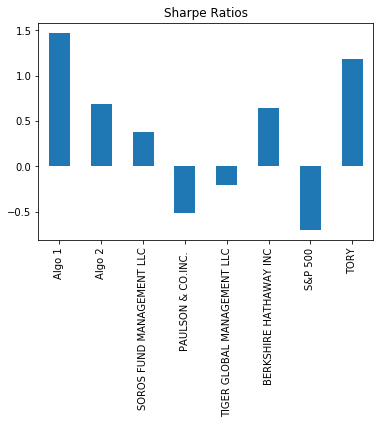

In [42]:
# Visualize the sharpe ratios as a bar plot

joined_sharpe_ratios.plot.bar(title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [43]:

joined_returns.corr()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,TORY
Algo 1,1.000000,0.278610,0.289406,0.256668,0.143040,0.269682,-0.018565,0.217693
Algo 2,0.278610,1.000000,0.818816,0.676692,0.465265,0.685533,0.018060,0.661505
SOROS FUND MANAGEMENT LLC,0.289406,0.818816,1.000000,0.683195,0.523173,0.749929,0.033345,0.635118
PAULSON & CO.INC.,0.256668,0.676692,0.683195,1.000000,0.401289,0.524542,0.047663,0.452646
TIGER GLOBAL MANAGEMENT LLC,0.143040,0.465265,0.523173,0.401289,1.000000,0.387224,0.010278,0.305123
BERKSHIRE HATHAWAY INC,0.269682,0.685533,0.749929,0.524542,0.387224,1.000000,0.028819,0.649147
S&P 500,-0.018565,0.018060,0.033345,0.047663,0.010278,0.028819,1.000000,0.021072
TORY,0.217693,0.661505,0.635118,0.452646,0.305123,0.649147,0.021072,1.000000


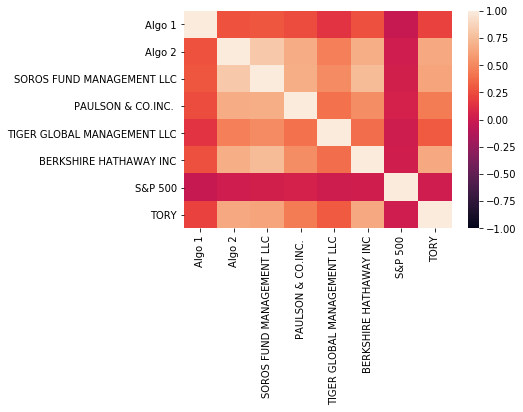

In [44]:
import seaborn as sns

sns.heatmap(joined_returns.corr(), vmin=-1, vmax=1)

### How does your portfolio fair?

#### With hindsight, my portfolio had the best trend for cumulative returns compared to the others for this time frame. But because my portfolio is not as diversifed as others, my portfolio also has the second largest spread on the boxplot and the largest standard deviation. My portfolio would have paid well for the risk an investor would have assumed. It has the second highest sharpe ratio with 1.17, only behind Algo 1 which has a sharpe ratio of 1.47 in the same time period. My portfolio also has a moderate positive correaltion with Algo 2, Soros Fund Management and Berkshire Hathaway. 